In [34]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import re

In [45]:
df = pd.read_csv(r"/home/david/Documents/Cyber-AI/data/mandarin_radicals.csv")

In [46]:
df.head()

,radical,variants,pinyin,learnt
0,一,NaN,yi1,False
1,丨,NaN,gun3,False
2,丿,"乀 (fu2), 乁(yi2)",pie3,False
3,乙,"乚 (yin3), 乛",yi4,False
4,亅,NaN,jue2,False


In [48]:

pattern = r'[^()]+'

for index, row in df.iterrows():

    print("Searching word(s):")
    print("{0}   {1}".format(row["radical"], row["pinyin"]))

    if not pd.isnull(df.loc[index, 'variants']):
        variants = row["variants"].split(",")
        for variant in variants:
            matches = re.findall(pattern, variant)

            if len(matches) == 2:
                print("{0}   {1}".format(matches[0], matches[1]))
            else:
                print("{0}   {1}".format(matches[0], row["pinyin"]))



Searching word(s):
一   yi1
Searching word(s):
丨   gun3
Searching word(s):
丿   pie3
乀    fu2
 乁   yi2
Searching word(s):
乙   yi4
乚    yin3
 乛   yi4
Searching word(s):
亅   jue2
Searching word(s):
丶   zhu3
Searching word(s):
二   er4
Searching word(s):
亠   tou2
Searching word(s):
人   ren2
亻   ren2
Searching word(s):
儿   er2
Searching word(s):
入   ru4
Searching word(s):
八   ba1
丷   ba1
Searching word(s):
冂   jiong3
Searching word(s):
冖   mi4
Searching word(s):
冫   bing1
Searching word(s):
几   ji1
Searching word(s):
凵   qu3
Searching word(s):
刀   dao1
刂   dao1
Searching word(s):
力   li4
Searching word(s):
勹   bao1
Searching word(s):
匕   bi3
Searching word(s):
匚   fang1
Searching word(s):
匸   xi3
Searching word(s):
十   shi2
Searching word(s):
卜   bu3
Searching word(s):
卩   jie2
Searching word(s):
厂   han4
Searching word(s):
厶   si1
Searching word(s):
又   you4
Searching word(s):
囗   wei2
Searching word(s):
土   tu3
Searching word(s):
士   shi4
Searching word(s):
夂   zhi3 (top)
Searching word(s):

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 2 to 182
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   radical   28 non-null     object
 1   variants  28 non-null     object
 2   pinyin    28 non-null     object
 3   learnt    28 non-null     bool  
dtypes: bool(1), object(3)
memory usage: 924.0+ bytes


In [31]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [18]:
df.loc[15, 'learnt'] = True
df.drop(df[df['learnt'] == True].index, inplace = True)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212 entries, 1 to 213
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   radical   212 non-null    object
 1   variants  28 non-null     object
 2   pinyin    212 non-null    object
 3   learnt    212 non-null    bool  
dtypes: bool(1), object(3)
memory usage: 6.8+ KB


In [6]:
df = pd.read_csv(r"/home/david/Documents/Cyber-AI/data/dataset_phishing.csv")
df.drop(columns="url", inplace=True)

mapping = {'phishing': 1, 'legitimate': 0}
column = df['status'].map(mapping)
df['status'] = column


df.to_csv(r"/home/david/Documents/Cyber-AI/data/dataset_phishing.csv", index=False)

<Axes: ylabel='status'>

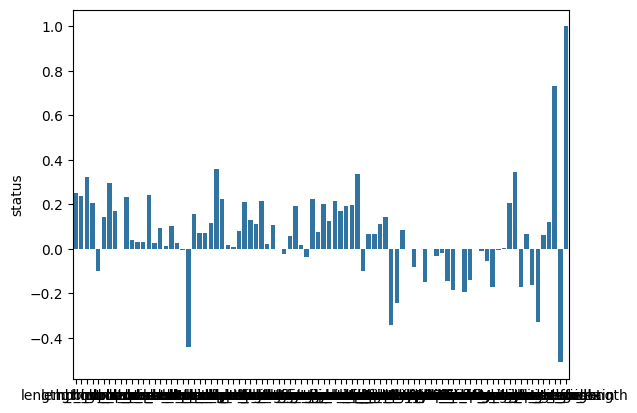

In [9]:
corrs = df.corr()
reses = corrs["status"]
reses

sns.barplot(reses)

In [11]:
co = reses[abs(reses) > 0.2]
co.info()

<class 'pandas.core.series.Series'>
Index: 24 entries, length_url to status
Series name: status
Non-Null Count  Dtype  
--------------  -----  
24 non-null     float64
dtypes: float64(1)
memory usage: 384.0+ bytes


In [14]:
correlated = df[co.index]
correlated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   length_url           11430 non-null  int64  
 1   length_hostname      11430 non-null  int64  
 2   ip                   11430 non-null  int64  
 3   nb_dots              11430 non-null  int64  
 4   nb_qm                11430 non-null  int64  
 5   nb_eq                11430 non-null  int64  
 6   nb_slash             11430 non-null  int64  
 7   nb_www               11430 non-null  int64  
 8   ratio_digits_url     11430 non-null  float64
 9   ratio_digits_host    11430 non-null  float64
 10  tld_in_subdomain     11430 non-null  int64  
 11  prefix_suffix        11430 non-null  int64  
 12  shortest_word_host   11430 non-null  int64  
 13  longest_words_raw    11430 non-null  int64  
 14  longest_word_path    11430 non-null  int64  
 15  phish_hints          11430 non-null 

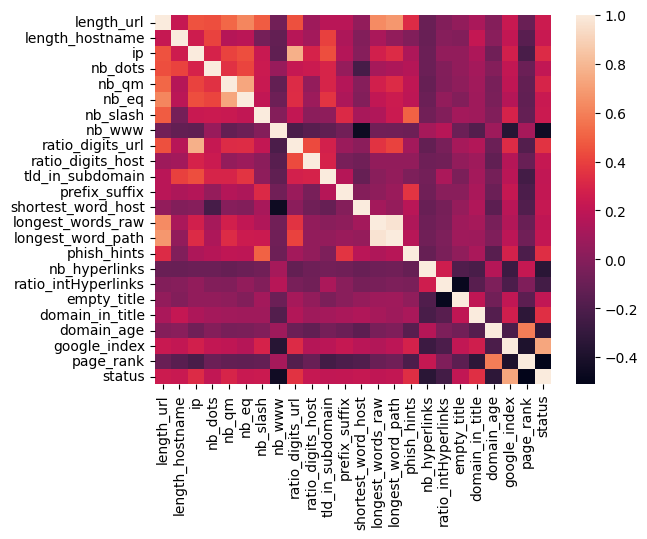

In [16]:
sns.heatmap(correlated.corr())

correlated.to_csv(r"/home/david/Documents/Cyber-AI/data/dataset_phishing_reduced.csv", index=False)

In [11]:
results = pd.DataFrame(df.corr()['Result'])
results['absos'] = results.abs()
filtered_df = results.query('absos >= 0.15 and absos <= 1')
filtered_df = filtered_df.drop('absos', axis=1)

names = filtered_df.index

In [12]:
filters = df[names]
filters

,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Request_URL,URL_of_Anchor,Links_in_tags,SFH,web_traffic,Result
0,-1,-1,-1,-1,1,-1,1,-1,-1,-1
1,-1,0,1,-1,1,0,-1,-1,0,-1
2,-1,-1,-1,-1,1,0,-1,-1,1,-1
3,-1,-1,-1,1,-1,0,0,-1,1,-1
4,-1,1,1,-1,1,0,0,-1,0,1
...,...,...,...,...,...,...,...,...,...,...
11050,1,1,1,-1,1,1,1,-1,-1,1
11051,-1,1,-1,-1,1,-1,-1,0,1,-1
11052,-1,1,-1,-1,1,0,-1,-1,1,-1
11053,-1,-1,-1,1,-1,-1,1,-1,1,-1


In [8]:
filters.to_csv("/home/david/Documents/Cyber-AI/data/Training_data_reduced.csv", index=False)

(11055, 10)


((8291, 9), (2764, 9), (8291,), (2764,))

Max neighbours: 1 Accuracy: 0.953328509406657


<Axes: >

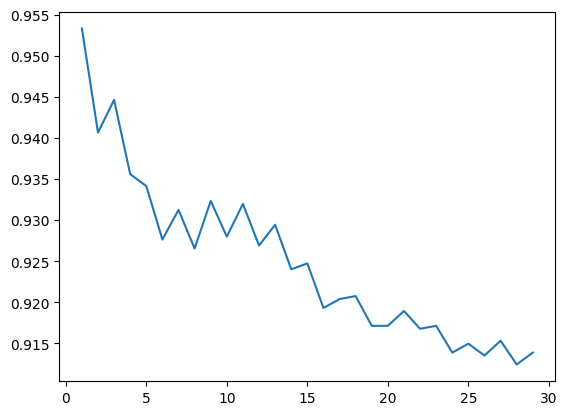

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

data = pd.read_csv(r"/home/david/Documents/Cyber-AI/data/Training Dataset.csv")

labels = data["Result"]
data = data.drop("Result", axis=1)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42)

scores = []

max_i = 1
max_accuracy = 0

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    scores.append(accuracy)

    if accuracy > max_accuracy:
        max_accuracy = accuracy
        max_i = i

print(f"Max neighbours: {max_i} Accuracy: {max_accuracy}")

sns.lineplot(x=range(1, 30), y=scores)

In [9]:
data_path = r"/home/david/Documents/Cyber-AI/data/Student_Performance.csv"
df = pd.read_csv(data_path)

mapping = {'Yes': 1, 'No': 0}
column = df['Extracurricular Activities'].map(mapping)
df['Extracurricular Activities'] = column

labels = df["Performance Index"]
data = df.drop("Performance Index", axis=1)

In [10]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5


In [2]:
from math import pow

In [3]:
quant = 0.717
cyber = 153.6
robotics = 45.85
ai = 19.2

quant_cagr = 1.32
cyber_cagr = 1.138
robotics_cagr = 1.159
ai_cagr = 1.362

quant_list = []
cyber_list = []
robotics_list = []
ai_list = []

for years in range(50):

    quant = quant * pow(quant_cagr, years)
    cyber = cyber * pow(cyber_cagr, years)
    robotics = robotics * pow(robotics_cagr, years)
    ai = ai * pow(ai_cagr, years)

    quant_list.append(quant)
    cyber_list.append(cyber)
    robotics_list.append(robotics)
    ai_list.append(ai)

df = pd.DataFrame({"Year": range(50), "Quantum": quant_list, "Cyber": cyber_list, "Robotics": robotics_list, "AI": ai_list})
df

,Year,Quantum,Cyber,Robotics,AI
0,0,7.170000e-01,1.536000e+02,4.585000e+01,1.920000e+01
1,1,9.464400e-01,1.747968e+02,5.314015e+01,2.615040e+01
2,2,1.649077e+00,2.263695e+02,7.138215e+01,4.851014e+01
3,3,3.792824e+00,3.336144e+02,1.111322e+02,1.225643e+02
4,4,1.151485e+01,5.595177e+02,2.005274e+02,4.217667e+02
5,5,4.614537e+01,1.067887e+03,4.193637e+02,1.976778e+03
6,6,2.441022e+02,2.319416e+03,1.016463e+03,1.261887e+04
7,7,1.704469e+03,5.732902e+03,2.855456e+03,1.097135e+05
8,8,1.571016e+04,1.612548e+04,9.297004e+03,1.299203e+06
9,9,1.911376e+05,5.161703e+04,3.508278e+04,2.095420e+07


In [4]:
fig = px.line(df, x='Year', y=df.columns[1:])
fig.show()